# 目标

该数据集来自南斯拉夫卢布尔雅那大学医疗中心肿瘤研究所，其特征是从乳腺肿块的细针抽吸物（FNA）的数字化图像中计算出来的。它们描述了图像中细胞核的特征，是一个常用的标准数据集。本次分析数据将用来预测癌症是良性还是恶性。而我在这次数据分析中，使用的是逻辑回归（LogisticRegression）算法，接下来就着此目标来展示代码。

## 什么是逻辑回归

逻辑回归（Logistic Regression）是一种分类算法，它预测事件发生的概率。虽然它的名字中包含“回归”二字，但实际上它是用来解决二分类（binary classification）问题的，有时也可以扩展到多分类（multi-class classification）问题。

### 基本原理

逻辑回归的基本思想是：通过对数据进行线性回归分析，然后将线性回归的结果通过一个特定的函数（通常是Logistic函数，也称为Sigmoid函数）映射到(0,1)区间内，这样就可以将其解释为概率。具体来说，逻辑回归模型会预测正类（通常标记为1）发生的概率，基于这个概率和一个设定的阈值（如0.5），可以将概率转换成一个二元的分类结果。

### sigmoid函数

sigmoid函数的数学表达式为：f(x) = 1 / (1 + e^(-x)) 其函数图像展示了一个优美的S形曲线，在逻辑回归、人工神经网络中有着广泛的应用。Sigmoid函数的输出范围为(0,1)，使其适用于二元分类和逻辑回归问题。

### 损失函数

损失函数（loss function）或代价函数（cost function）是将随机事件或其有关随机变量的取值映射为非负实数以表示该随机事件的“风险”或“损失”的函数。在应用中，损失函数通常作为学习准则与优化问题相联系，即通过最小化损失函数求解和评估模型。

### 优化算法

逻辑回归通常使用梯度下降（Gradient Descent）算法进行参数的优化。通过计算损失函数关于参数的梯度，并更新参数来最小化损失函数。

### 优缺点

#### 优点

模型简单，易于理解和实现。



计算效率高，适合大规模数据集。


可以给出分类结果的概率解释。

#### 缺点

对于非线性问题，需要手动添加特征或使用多项式回归。



当特征空间很大时，性能可能不如支持向量机（SVM）等更复杂的模型。



需要一个合适的阈值来将概率转换为分类结果，这个阈值可能依赖于特定的应用场景。

### 应用场景

逻辑回归广泛应用于各种分类问题，如垃圾邮件检测、疾病诊断、二元选项预测等。由于它能够提供概率输出，因此在需要评估事件发生可能性的场景中特别有用。

# 代码

## 导入库

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## 加载数据集

In [6]:
data = pd.read_csv('data.csv')

## 了解数据的概况，从而更好地进行后续的数据处理和分析。

属性信息： (a) radius (mean of distances from center to points on the perimeter) (b) texture (standard deviation of gray-scale values) (c) perimeter (d) area (e) smoothness (local variation in radius lengths) (f) compactness (perimeter^2 / area - 1.0) (g) concavity (severity of concave portions of the contour) (h) concave points (number of concave portions of the contour) (i) symmetry (j) fractal dimension ("coastline approximation" - 1) The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. 所有特征值都用四位有效数字重新编码。 缺少属性值：无 类别分布：良性357种，恶性212种

In [7]:
#每一列的数据类型、非空值的数量、内存占用等信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
#快速查看数据的统计摘要，可以帮助我们快速了解数据的分布情况。
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 对数据集进行处理，并将处理后的数据集分为特征集和标签集

In [9]:
#删除名为id和Unnamed: 32的两列
data.drop(['id','Unnamed: 32'], inplace= True, axis = 1)

In [10]:
x = data.drop('diagnosis', axis=1) 
#创建一个新的x，用作模型的特征集
y = data['diagnosis'] 
# 目标变量diagnosis

In [11]:
#计算diagnosis列中各个值的频数
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## 准备数据、构建模型、配置模型，并打印模型的摘要信息，调用模型训练

In [12]:
scaler = MinMaxScaler() 
#对特征数据x进行缩放，并计算缩放比例，这些比例用于将数据缩放回原始范围。
x = scaler.fit_transform(x)

In [13]:
encoder = LabelEncoder()
#对目标变量y进行编码，将分类标签转换为整数编码。
y = encoder.fit_transform(y)

In [14]:
#使用train_test_split函数将数据分为训练集和测试集。test_size=0.1表示测试集占数据集的10%，shuffle=True表示在分割前进行随机打乱，random_state=33表示使用固定的随机数种子以确保结果的可重复性。
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=33)

## 逻辑回归模型：实例化LogisticRegression类创建一个逻辑回归模型 

In [15]:
#创建一个逻辑回归的模型
model = LogisticRegression()

这行代码实例化了一个逻辑回归模型对象。在这个阶段，模型还没有进行任何训练，因此它还没有学习到任何数据的特征

In [16]:
# 训练模型
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

使用训练数据集（X_train和y_train）来训练模型。fit方法是一种监督学习方法，它根据提供的训练数据来调整模型的参数。在这个过程中，模型会尝试找到最优的权重和偏置，以最小化预测误差。

In [17]:
# 预测测试集结果
y_pred = model.predict(X_test)

一旦模型被训练，就可以使用它来对测试集（X_test）进行预测。predict方法根据模型的决策边界对输入数据进行分类，返回预测的类别标签。

In [18]:
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9824561403508771


使用accuracy_score函数来计算模型的准确率。这个函数接受真实标签（y_test）和模型预测的标签（y_pred）作为输入，并返回准确率，即预测正确的样本数占总样本数的比例。打印出的准确率提供了模型性能的一个量化指标。

## 打印分类报告

In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99        44
          1       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        57



## 可视化图形分析并计算预测

### 混淆矩阵的打印

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[44  0]
 [ 1 12]]


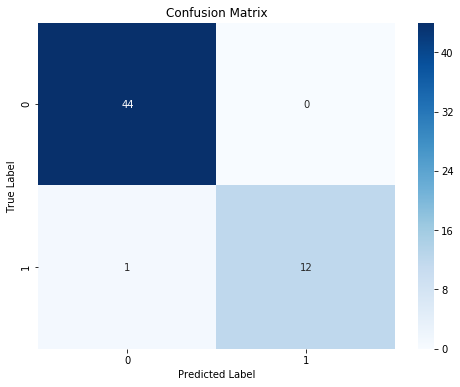

In [21]:
#将矩阵可视化，达到更好的体现效果
# 使用Seaborn可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # annot=True显示每个格子的值，fmt='d'表示整数格式
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

在这段代码中，conf_matrix变量需要在执行这段代码之前定义，并且它应该是一个NumPy数组或类似结构，其中包含了混淆矩阵的数据。这个混淆矩阵通常由分类模型的评估函数生成，例如使用sklearn.metrics.confusion_matrix函数。这段代码通过Seaborn的热图功能，以直观的方式展示了混淆矩阵，使得模型的性能评估更加清晰易懂。

### 使用交叉验证来模拟训练和验证性能

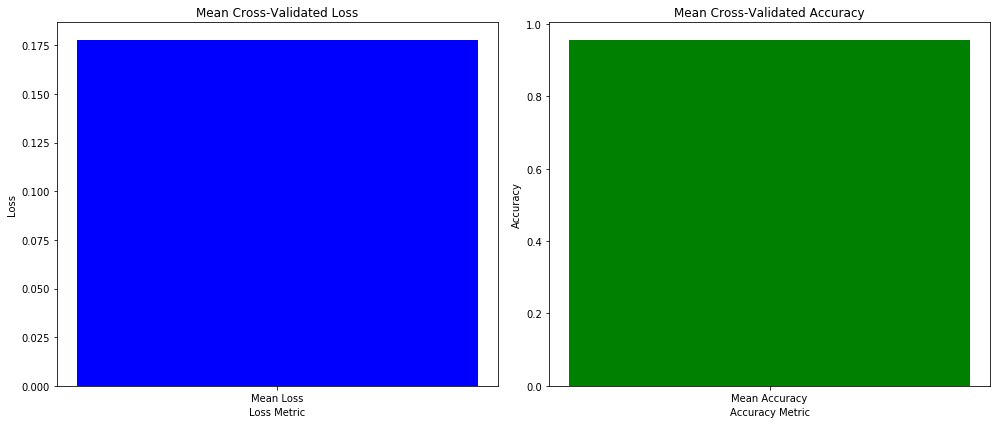

In [22]:

from sklearn.model_selection import cross_val_score

# 使用交叉验证计算准确率和损失
# cv=5表示5折交叉验证
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
losses = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_log_loss')

# 计算平均准确率和损失
mean_accuracy = accuracies.mean()
mean_loss = -losses.mean()  # 负对数损失，取负得到实际损失

# 创建图形窗口和子图
plt.figure(figsize=(14, 6))

# 第一个子图：显示损失曲线
plt.subplot(1, 2, 1)
plt.bar(['Mean Loss'], [mean_loss], color='blue')
plt.title('Mean Cross-Validated Loss')
plt.xlabel('Loss Metric')
plt.ylabel('Loss')

# 第二个子图：显示准确率曲线
plt.subplot(1, 2, 2)
plt.bar(['Mean Accuracy'], [mean_accuracy], color='green')
plt.title('Mean Cross-Validated Accuracy')
plt.xlabel('Accuracy Metric')
plt.ylabel('Accuracy')

# 显示图形
plt.tight_layout()
plt.show()

导入库：
代码开始处导入了matplotlib.pyplot用于绘图，cross_val_score用于交叉验证。
创建逻辑回归模型：
实例化LogisticRegression类，创建一个逻辑回归模型。
交叉验证：
使用cross_val_score函数对逻辑回归模型进行5折交叉验证。这有助于评估模型在不同子集上的泛化能力，并减少过拟合的风险。
计算性能指标：
使用scoring='accuracy'计算交叉验证过程中每个折的准确率，得到准确率的列表。
使用scoring='neg_log_loss'计算交叉验证过程中每个折的负对数损失，得到损失的列表。
计算平均性能：计算交叉验证得到的准确率和损失的平均值，这提供了模型整体性能的量化指标。
这个图形提供了一个直观的模型性能评估，帮助用户了解模型在训练数据上的整体表现。然而，由于逻辑回归是一个单次训练的模型，所以这里没有动态变化的曲线，如训练和验证损失或准确率随时间变化的曲线，这些通常与迭代训练的深度学习模型相关。

### ROC曲线模型性能测试

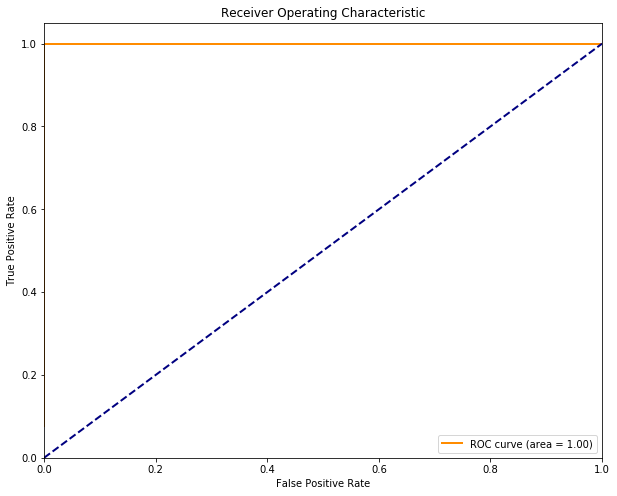

In [23]:
# 预测测试集的概率
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算ROC曲线的FPR和TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# 计算AUC
roc_auc = auc(fpr, tpr)
# 绘制ROC曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

这段代码的目的是使用逻辑回归模型评估和可视化模型在测试集上的性能，具体通过绘制接收者操作特征曲线（ROC Curve）来实现。执行这段代码后，你将看到一个绘制了ROC曲线和随机猜测直线的图形窗口，其中ROC曲线的面积（AUC）作为模型性能的指标被标注在图例中。这个图形提供了对模型分类性能的直观评估，特别是在二分类问题中非常有用。